In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.7 MB/s eta 0:00:00


Full metadata:
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 202
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.405.2831175866.1620651396.595584
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.25403.1.1.1
(0002,0013) Implementation Version Name         SH: 'Dicom 0.1'
(0002,0016) Source Application Entity Title     AE: 'RESEARCH'
-------------------------------------------------
(0008,0000) Group Length                        UL: 524
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008,0012) Instance Creation Date              DA: '20210510'
(0008,0013) Instance Creati

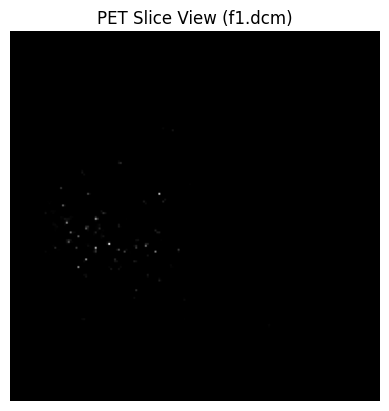

In [6]:
import pydicom
import os

# Path to any one DICOM file (you can test with multiple if needed)
dcm_path = "/content/drive/MyDrive/f39.dcm"

# Load the DICOM file
ds = pydicom.dcmread(dcm_path)

# Print all metadata (optional, to explore)
print("Full metadata:")
print(ds)

# Extract useful fields that might reveal organ/body part
print("\n--- Key Information ---")
fields_to_check = [
    "StudyDescription",
    "SeriesDescription",
    "BodyPartExamined",
    "ProtocolName",
    "StudyComments",
    "PatientPosition",
]

for field in fields_to_check:
    if field in ds:
        print(f"{field}: {ds.data_element(field).value}")
    else:
        print(f"{field}: Not Found")

# Optional: Show the image slice
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array, cmap='gray')
plt.title("PET Slice View (f1.dcm)")
plt.axis('off')
plt.show()


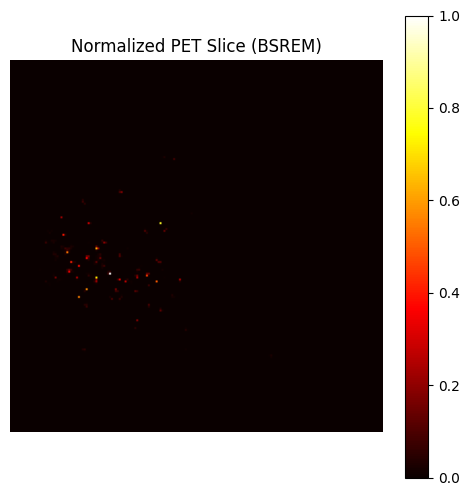

In [7]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Load DICOM
ds = pydicom.dcmread(dcm_path)
image = ds.pixel_array.astype(np.float32)

# Normalize to [0, 1]
norm_img = (image - np.min(image)) / (np.max(image) - np.min(image))

# Plot with better contrast
plt.figure(figsize=(6,6))
plt.imshow(norm_img, cmap='hot')  # 'hot' works better for PET
plt.title("Normalized PET Slice (BSREM)")
plt.axis('off')
plt.colorbar()
plt.show()

In [7]:
pip install SimpleITK pydicom matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 24.5 MB/s eta 0:00:00


In [8]:

pip install pydicom numpy matplotlib scikit-image


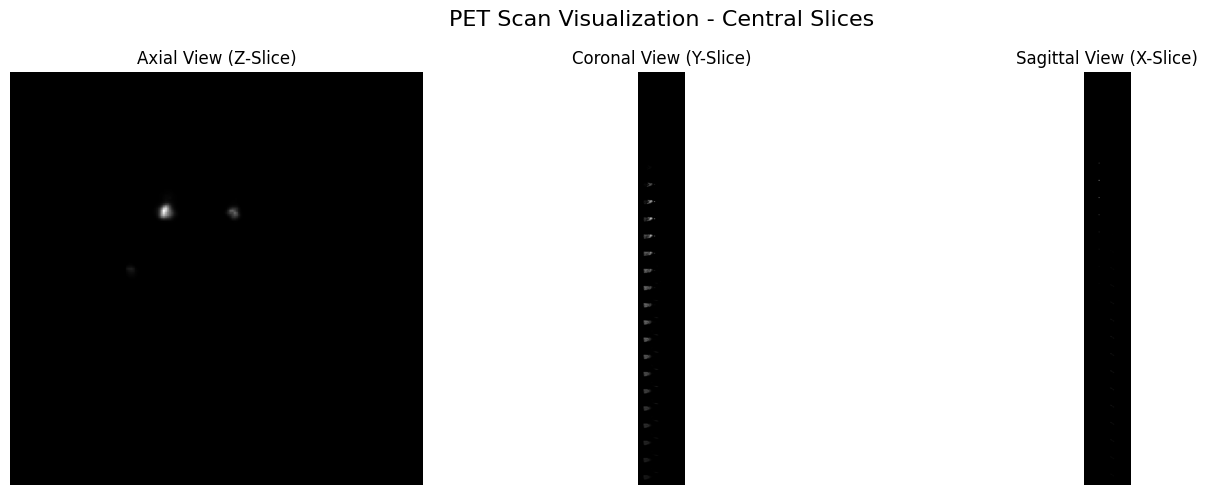

In [8]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

# --- Step 1: Set the path to your DICOM folder ---
dicom_dir = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"  # ← Replace with your actual path

# --- Step 2: Read the DICOM series ---
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
reader.SetFileNames(dicom_names)
image = reader.Execute()

# --- Step 3: Convert to numpy array ---
volume = sitk.GetArrayFromImage(image)  # shape: [slices, height, width]

# --- Step 4: Visualize central slices in 3 planes ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial (top view)
axes[0].imshow(volume[volume.shape[0] // 2], cmap="gray")
axes[0].set_title("Axial View (Z-Slice)")
axes[0].axis("off")

# Coronal (front view)
axes[1].imshow(volume[:, volume.shape[1] // 2, :], cmap="gray")
axes[1].set_title("Coronal View (Y-Slice)")
axes[1].axis("off")

# Sagittal (side view)
axes[2].imshow(volume[:, :, volume.shape[2] // 2], cmap="gray")
axes[2].set_title("Sagittal View (X-Slice)")
axes[2].axis("off")

plt.suptitle("PET Scan Visualization - Central Slices", fontsize=16)
plt.tight_layout()
plt.show()

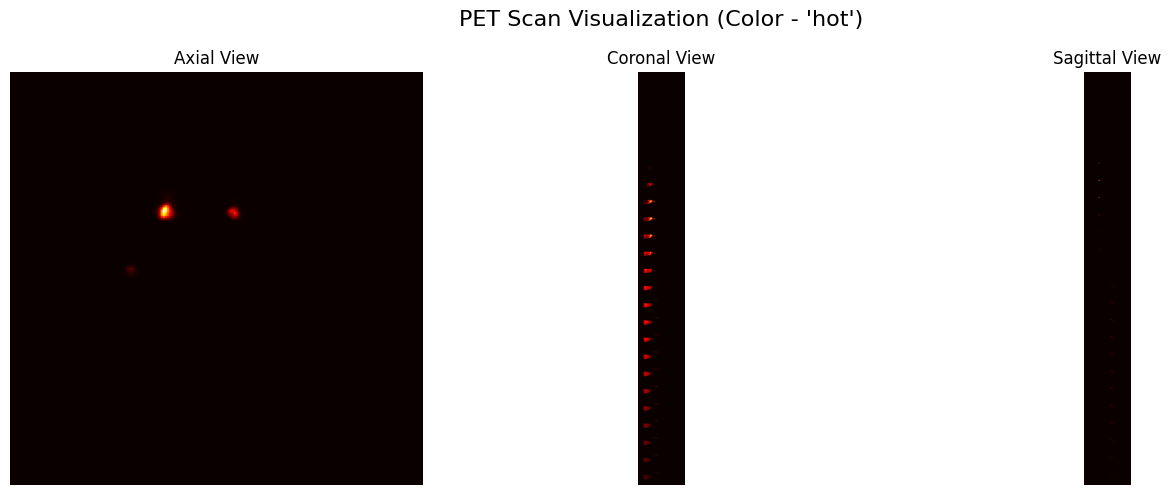

In [9]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

# --- Step 1: Set your DICOM folder path ---
dicom_dir = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM" # ← Replace this with your real folder path

# --- Step 2: Read the DICOM series ---
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
reader.SetFileNames(dicom_names)
image = reader.Execute()

# --- Step 3: Convert to NumPy array ---
volume = sitk.GetArrayFromImage(image)  # shape: [slices, height, width]

# --- Step 4: Visualize in color ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (middle of volume)
axes[0].imshow(volume[volume.shape[0] // 2], cmap='hot')  # 🔥 Hot colormap
axes[0].set_title("Axial View")
axes[0].axis("off")

# Coronal slice (middle Y)
axes[1].imshow(volume[:, volume.shape[1] // 2, :], cmap='hot')
axes[1].set_title("Coronal View")
axes[1].axis("off")

# Sagittal slice (middle X)
axes[2].imshow(volume[:, :, volume.shape[2] // 2], cmap='hot')
axes[2].set_title("Sagittal View")
axes[2].axis("off")

plt.suptitle("PET Scan Visualization (Color - 'hot')", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
import os
import pydicom
import SimpleITK as sitk
import numpy as np

# Path to the directory containing DICOM files
dicom_dir = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"

# Load DICOM series
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
reader.SetFileNames(dicom_names)

# Read the image volume
image = reader.Execute()
volume = sitk.GetArrayFromImage(image)  # shape: (slices, height, width)

# Get size and spacing
slices, height, width = volume.shape
spacing = image.GetSpacing()

print(f"Volume shape (slices, height, width): {volume.shape}")
print(f"Voxel spacing (z, y, x): {spacing}")

# Estimate organ based on slice count
if slices < 30:
    organ_guess = "Likely Brain"
elif 30 <= slices <= 100:
    organ_guess = "Likely Chest or Abdomen"
else:
    organ_guess = "Likely Whole Body or Large Scan Region"

print(f"\n Estimated scanned region: {organ_guess}")

Volume shape (slices, height, width): (1704, 192, 192)
Voxel spacing (z, y, x): (1.8229166269302, 1.8229166269302, 0.11467997382405283)

 Estimated scanned region: Likely Whole Body or Large Scan Region


In [11]:
import os
import pydicom
from collections import defaultdict

# Set your directory path
folder = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"

# Group files by SeriesInstanceUID
series_dict = defaultdict(list)

for filename in os.listdir(folder):
    if filename.endswith(".dcm"):
        filepath = os.path.join(folder, filename)
        ds = pydicom.dcmread(filepath, stop_before_pixels=True)
        series_uid = ds.SeriesInstanceUID
        series_dict[series_uid].append(filepath)

# See how many series you have
for uid, files in series_dict.items():
    print(f"Series UID: {uid}, Number of slices: {len(files)}")


Series UID: 1.2.840.113619.2.405.3.2831175866.304.1620621133.225, Number of slices: 1704


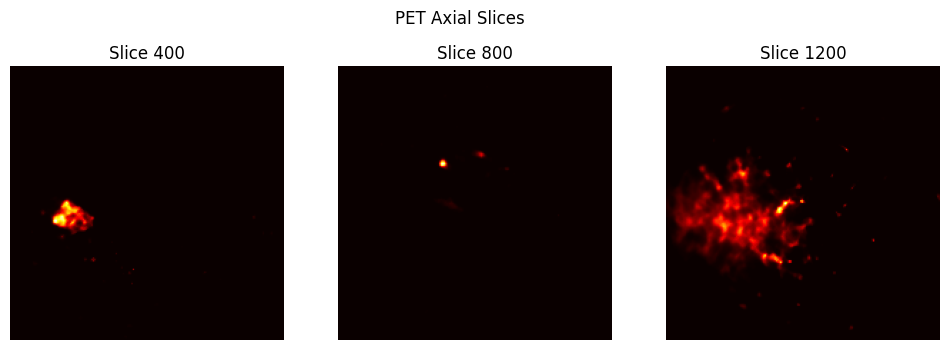

In [16]:
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt

# Set path to your selected folder
folder_path = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"

# Read all DICOM files
files = [pydicom.dcmread(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith(".dcm")]

# Sort by slice order
files.sort(key=lambda x: int(x.InstanceNumber))

# Build 3D volume
volume = np.stack([f.pixel_array for f in files])

# Normalize for visualization
volume = volume.astype(np.float32)
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# Visualize some slices (mid-section)
plt.figure(figsize=(12, 4))
for i, idx in enumerate([400, 800, 1200]):
    plt.subplot(1, 3, i+1)
    plt.imshow(volume[idx], cmap='hot')  # or 'jet' for color
    plt.title(f"Slice {idx}")
    plt.axis('off')
plt.suptitle("PET Axial Slices")
plt.show()


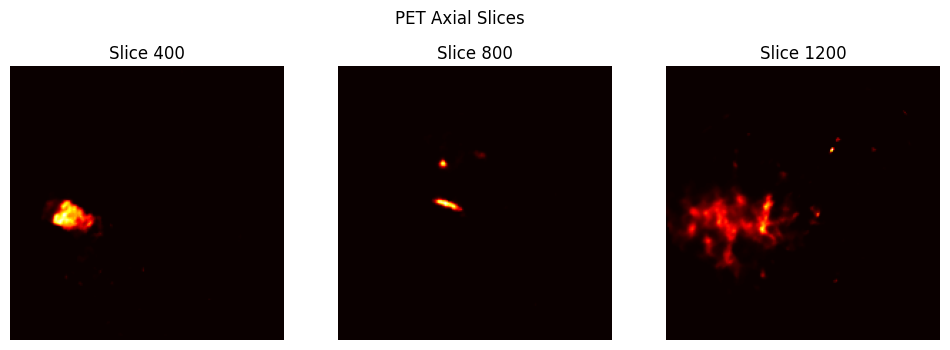

In [15]:
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt

# Set path to your selected folder
folder_path = "/content/drive/MyDrive/BSREM/PT_60p 250_100  BSREM"

# Read all DICOM files
files = [pydicom.dcmread(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith(".dcm")]

# Sort by slice order
files.sort(key=lambda x: int(x.InstanceNumber))

# Build 3D volume
volume = np.stack([f.pixel_array for f in files])

# Normalize for visualization
volume = volume.astype(np.float32)
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# Visualize some slices (mid-section)
plt.figure(figsize=(12, 4))
for i, idx in enumerate([400, 800, 1200]):
    plt.subplot(1, 3, i+1)
    plt.imshow(volume[idx], cmap='hot')  # or 'jet' for color
    plt.title(f"Slice {idx}")
    plt.axis('off')
plt.suptitle("PET Axial Slices")
plt.show()

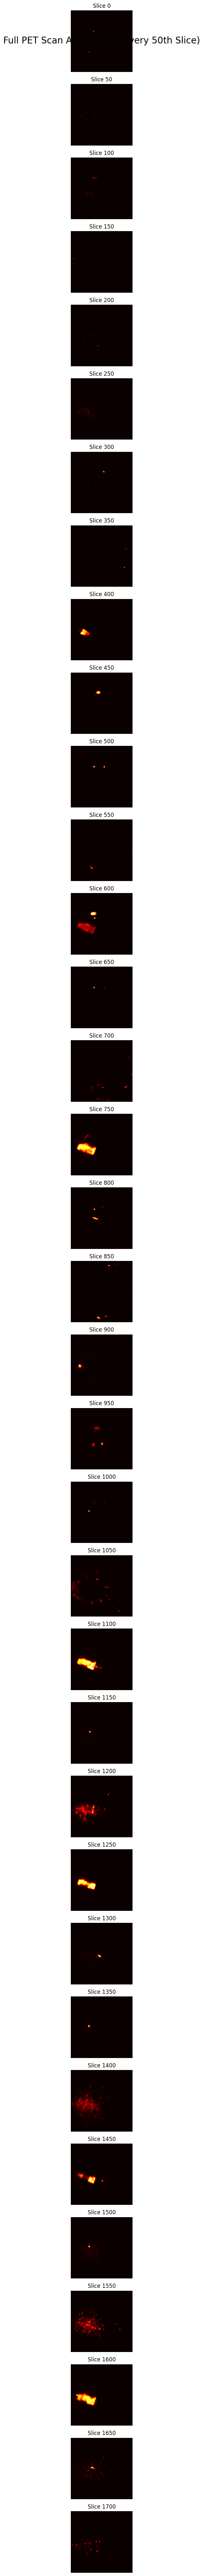

In [17]:


# Step 2: Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom

# Step 3: Set your DICOM folder path
folder_path = "/content/drive/MyDrive/BSREM/PT_60p 250_100  BSREM"

# Step 4: Load and sort DICOM files
files = [pydicom.dcmread(os.path.join(folder_path, f))
         for f in os.listdir(folder_path) if f.endswith(".dcm")]
files.sort(key=lambda x: int(x.InstanceNumber))

# Step 5: Stack into 3D volume
volume = np.stack([f.pixel_array for f in files])
volume = volume.astype(np.float32)
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))  # Normalize to 0-1

# Step 6: Plot every 50th axial slice (to avoid memory overflow)
plt.figure(figsize=(20, 80))  # Adjust height for more slices
num_slices = volume.shape[0]
step = 50  # Change this to 20 or 10 if you want more detail

for i, idx in enumerate(range(0, num_slices, step)):
    plt.subplot(len(range(0, num_slices, step)), 1, i+1)
    plt.imshow(volume[idx], cmap='hot')
    plt.title(f"Slice {idx}")
    plt.axis('off')

plt.suptitle("Full PET Scan Axial Slices (Every 50th Slice)", fontsize=20)
plt.tight_layout()
plt.show()


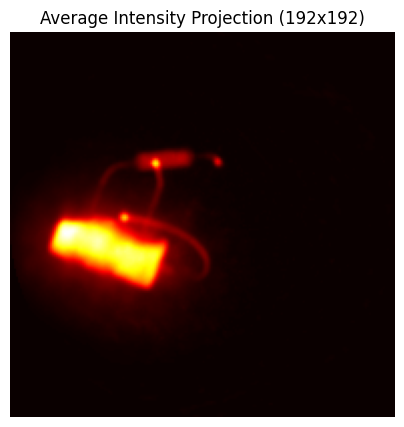

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom

# Path to your DICOM folder
folder_path = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"  # Replace with your path

# Read and sort DICOM files
files = [pydicom.dcmread(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith(".dcm")]
files.sort(key=lambda x: int(x.InstanceNumber))

# Stack into 3D volume
volume = np.stack([f.pixel_array for f in files])
volume = volume.astype(np.float32)
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))  # Normalize to 0–1

# Combine: Mean projection along axial axis (depth)
combined_image = np.mean(volume, axis=0)  # Result is 192x192

# Visualize
plt.figure(figsize=(5, 5))
plt.imshow(combined_image, cmap='hot')
plt.title("Average Intensity Projection (192x192)")
plt.axis('off')
plt.savefig("combined_192x192_projection.png", bbox_inches='tight', dpi=300)
plt.show()


In [22]:
import pydicom
import os

folder_path = "/content/drive/MyDrive/BSREM/PT_60p 250_100  BSREM"

slice_locations = []
for f in sorted(os.listdir(folder_path)):
    if f.endswith(".dcm"):
        ds = pydicom.dcmread(os.path.join(folder_path, f))
        try:
            # Use ImagePositionPatient[2] if SliceLocation not present
            z = float(ds.ImagePositionPatient[2])
        except:
            z = float(ds.SliceLocation)
        slice_locations.append(z)

print("Min Z:", min(slice_locations))
print("Max Z:", max(slice_locations))
print("Number of slices:", len(slice_locations))


Min Z: -89.599990844726
Max Z: 105.700004577636
Number of slices: 1704


In [23]:
import pydicom
import os

# Replace with your actual folder path
folder_path = "/content/drive/MyDrive/BSREM/PT_60p 250_100  BSREM"
files = [f for f in os.listdir(folder_path) if f.endswith(".dcm")]

# Load first file
sample = pydicom.dcmread(os.path.join(folder_path, files[0]))

# Print useful metadata
print("Study Description:", sample.get("StudyDescription", "N/A"))
print("Series Description:", sample.get("SeriesDescription", "N/A"))
print("Body Part Examined:", sample.get("BodyPartExamined", "N/A"))
print("Protocol Name:", sample.get("ProtocolName", "N/A"))
print("Patient Position:", sample.get("PatientPosition", "N/A"))
print("Modality:", sample.get("Modality", "N/A"))
print("Image Orientation (Patient):", sample.get("ImageOrientationPatient", "N/A"))
print("Image Position (Patient):", sample.get("ImagePositionPatient", "N/A"))


Study Description: Chest
Series Description: 60p 250/100  BSREM
Body Part Examined: N/A
Protocol Name: 5.22 PTCT_RGD_H2O_LEPO
Patient Position: FFS
Modality: PT
Image Orientation (Patient): [1, 0, 0, 0, 1, -0]
Image Position (Patient): [-174.08854675292, -174.08854675292, 22.0000057220459]


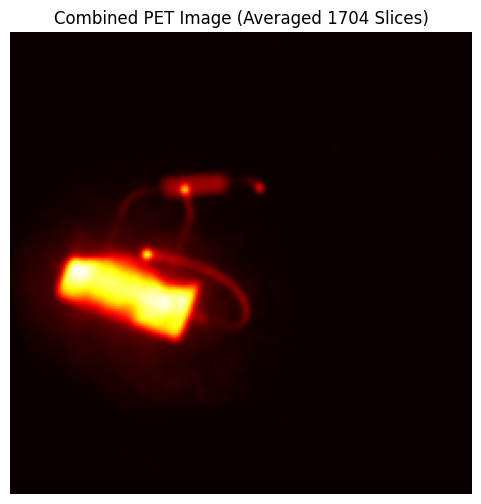

In [39]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Set your folder path with 1704 DICOM files
folder_path = "/content/drive/MyDrive/BSREM/PT_40p 250_150  BSREM"

# Load and sort DICOM files
dicom_files = [
    pydicom.dcmread(os.path.join(folder_path, f))
    for f in sorted(os.listdir(folder_path))
    if f.endswith(".dcm")
]
dicom_files.sort(key=lambda x: int(x.InstanceNumber))

# Stack all slices into 3D volume
volume = np.stack([f.pixel_array for f in dicom_files]).astype(np.float32)

# Normalize volume
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# Average across slices (collapse to 2D)
avg_image = np.mean(volume, axis=0)

# Resize to 192x192
avg_image_resized = resize(avg_image, (192, 192), mode='constant', anti_aliasing=True)

# Plot the combined image
plt.figure(figsize=(6, 6))
plt.imshow(avg_image_resized, cmap='hot')
plt.title("Combined PET Image (Averaged 1704 Slices)")
plt.axis('off')
plt.show()


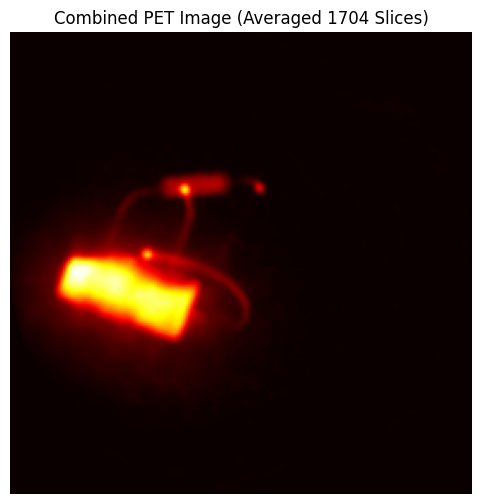

In [40]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Set your folder path with 1704 DICOM files
folder_path = "/content/drive/MyDrive/BSREM/PT_20p 200_160  BSREM"

# Load and sort DICOM files
dicom_files = [
    pydicom.dcmread(os.path.join(folder_path, f))
    for f in sorted(os.listdir(folder_path))
    if f.endswith(".dcm")
]
dicom_files.sort(key=lambda x: int(x.InstanceNumber))

# Stack all slices into 3D volume
volume = np.stack([f.pixel_array for f in dicom_files]).astype(np.float32)

# Normalize volume
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# Average across slices (collapse to 2D)
avg_image = np.mean(volume, axis=0)

# Resize to 192x192
avg_image_resized = resize(avg_image, (192, 192), mode='constant', anti_aliasing=True)

# Plot the combined image
plt.figure(figsize=(6, 6))
plt.imshow(avg_image_resized, cmap='hot')
plt.title("Combined PET Image (Averaged 1704 Slices)")
plt.axis('off')
plt.show()


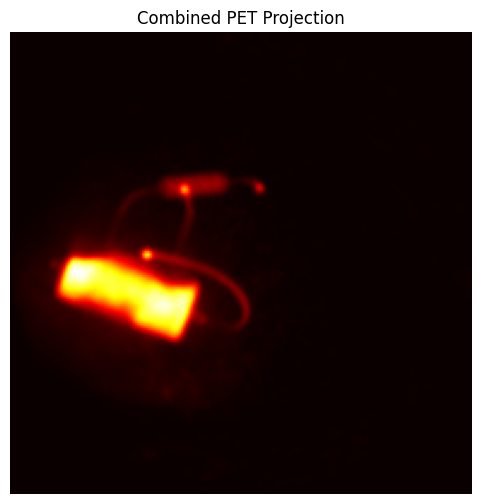


===== DICOM Metadata Summary =====
Modality: PT
Study Description: Chest
Series Description: 60p 250/100  BSREM
Protocol Name: 5.22 PTCT_RGD_H2O_LEPO
Body Part Examined: N/A
Patient Position: FFS
Z-Coverage: -89.6 mm to 105.7 mm (range: 195.3 mm)
Likely Organ(s): Thorax: likely lungs, heart, mediastinum


In [41]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Path to the DICOM folder
folder_path = "/content/drive/MyDrive/BSREM/PT_60p 250_100  BSREM"

# Load and sort DICOM files
dicom_files = [pydicom.dcmread(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith(".dcm")]
dicom_files.sort(key=lambda x: int(x.InstanceNumber))

# Build 3D volume
volume = np.stack([ds.pixel_array for ds in dicom_files])
volume = volume.astype(np.float32)
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# === Generate a single 2D image by summing slices ===
combined_image = np.sum(volume, axis=0)
combined_image = (combined_image - np.min(combined_image)) / (np.max(combined_image) - np.min(combined_image))

plt.figure(figsize=(6, 6))
plt.imshow(combined_image, cmap='hot')
plt.axis('off')
plt.title("Combined PET Projection")
plt.show()

# === Metadata Extraction for Organ Identification ===
first_file = dicom_files[0]

study_desc = first_file.get("StudyDescription", "Unknown")
series_desc = first_file.get("SeriesDescription", "Unknown")
protocol_name = first_file.get("ProtocolName", "Unknown")
body_part = first_file.get("BodyPartExamined", "N/A")
patient_position = first_file.get("PatientPosition", "Unknown")
modality = first_file.get("Modality", "Unknown")

# Get Z-position range
z_positions = [float(ds.ImagePositionPatient[2]) for ds in dicom_files]
min_z, max_z = min(z_positions), max(z_positions)
z_coverage = max_z - min_z

# === Organ Inference Logic ===
if "chest" in study_desc.lower() or (z_coverage > 150 and z_coverage < 250):
    organ_guess = "Thorax: likely lungs, heart, mediastinum"
elif z_coverage >= 250:
    organ_guess = "Whole-body or torso"
else:
    organ_guess = "Uncertain or localized area"

# === Display Metadata Summary ===
print("\n===== DICOM Metadata Summary =====")
print(f"Modality: {modality}")
print(f"Study Description: {study_desc}")
print(f"Series Description: {series_desc}")
print(f"Protocol Name: {protocol_name}")
print(f"Body Part Examined: {body_part}")
print(f"Patient Position: {patient_position}")
print(f"Z-Coverage: {min_z:.1f} mm to {max_z:.1f} mm (range: {z_coverage:.1f} mm)")
print(f"Likely Organ(s): {organ_guess}")
